## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [155]:
%matplotlib inline

In [156]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [157]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

In [158]:
df = pd.read_csv('data/human_body_temperature.csv')

In [159]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [160]:
#import seaborn as sns

# Question 1. Is the distribution of body temperatures normal?
I look at the distribution and do a visual test, the QQplot

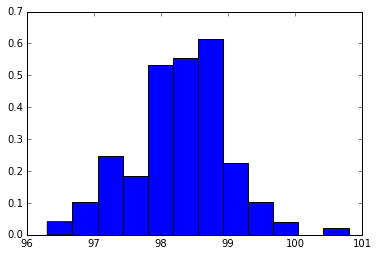

In [161]:
fig=plt.figure()
ax=plt.subplot(1,1,1)
plt.hist(df.temperature, bins=12,normed=True)
#sns.kdeplot(df.temperature)
plt.show()


#df.temperature.plot(kind='hist', bins=12)

In [162]:
df.temperature.mean(), df.temperature.std()

(98.24923076923078, 0.7331831580389454)

In [163]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats

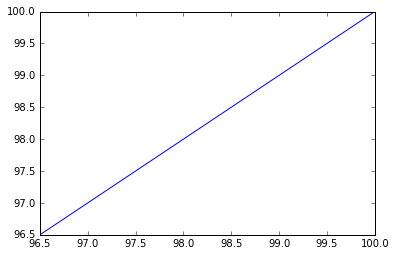

In [164]:
test_list=([(x,y) for x,y in zip(list(np.linspace(96.5,100,num=50)),list(np.linspace(96.5,100,num=50)))])
#plt.plot(test_list)           # THIS IS JUST SOME TEST CODE FOR THE LIST COMPREHENSION
plt.plot(*zip(*test_list));

## Here is my effort at a custom Q-Q plot

(96.5, 100)

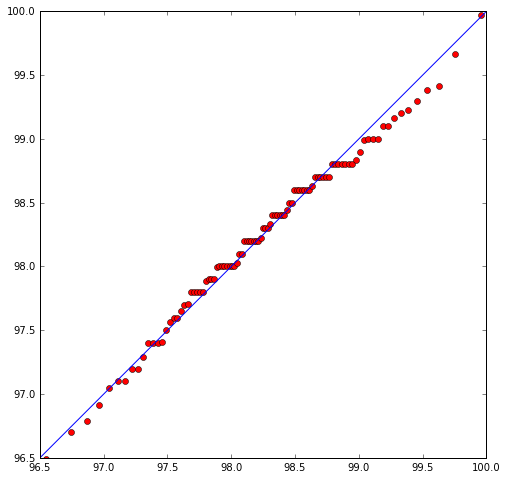

In [165]:
fig=plt.figure(figsize=(8,8)) #,facecolor='white')          #open a figure
ax=fig.add_subplot(1,1,1) #,axisbg='white')
tquants=stats.norm.ppf(np.linspace(0.01,0.99,num=99),df.temperature.mean(),df.temperature.std())  #percentiles of normal
empquants=np.percentile(df.temperature,np.arange(1,100,1))
data=ax.plot(tquants,empquants,color='r',marker='o',linestyle='None')  
test=[(x,y) for x,y in zip(list(np.linspace(96.5,100,num=50)),list(np.linspace(96.5,100,num=50)))]

line=ax.plot(*zip(*test), color='b',marker='None')
#ax.legend(data)
ax.set_xlim([96.5,100])
ax.set_ylim([96.5,100])


In [166]:
#list(np.linspace(96.5,100,num=50))

In [167]:
#[(x,y) for x,y in zip(list(np.linspace(96.5,100,num=50)),list(np.linspace(96.5,100,num=50)))]  # Test code

In [168]:
np.percentile(df.temperature,np.arange(1,100,1))  # generate quantile (percentile) values as Test code

array([ 96.487,  96.7  ,  96.787,  96.916,  97.045,  97.1  ,  97.103,
        97.2  ,  97.2  ,  97.29 ,  97.4  ,  97.4  ,  97.4  ,  97.406,
        97.5  ,  97.564,  97.6  ,  97.6  ,  97.651,  97.7  ,  97.709,
        97.8  ,  97.8  ,  97.8  ,  97.8  ,  97.8  ,  97.883,  97.9  ,
        97.9  ,  97.9  ,  97.999,  98.   ,  98.   ,  98.   ,  98.   ,
        98.   ,  98.   ,  98.   ,  98.031,  98.1  ,  98.1  ,  98.2  ,
        98.2  ,  98.2  ,  98.2  ,  98.2  ,  98.2  ,  98.2  ,  98.221,
        98.3  ,  98.3  ,  98.3  ,  98.337,  98.4  ,  98.4  ,  98.4  ,
        98.4  ,  98.4  ,  98.4  ,  98.44 ,  98.5  ,  98.5  ,  98.6  ,
        98.6  ,  98.6  ,  98.6  ,  98.6  ,  98.6  ,  98.6  ,  98.63 ,
        98.7  ,  98.7  ,  98.7  ,  98.7  ,  98.7  ,  98.704,  98.8  ,
        98.8  ,  98.8  ,  98.8  ,  98.8  ,  98.8  ,  98.8  ,  98.836,
        98.9  ,  98.994,  99.   ,  99.   ,  99.   ,  99.1  ,  99.1  ,
        99.168,  99.2  ,  99.226,  99.3  ,  99.384,  99.413,  99.668,
        99.971])

## Here is a different version of a Q-Q plot

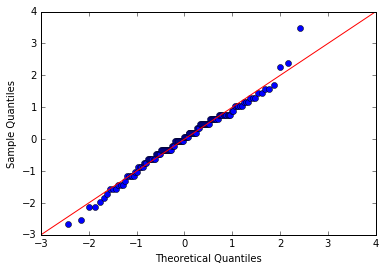

In [169]:
sm.graphics.qqplot(df.temperature, line='45',fit=True); #dist='norm',loc=98.24923076923078,plot=pylab)

## Conclusion:  Not normal.
 Inspection of the historgram and the Q-Q plots suggest that the data deviate from a normal distribution.  That deviation is at both ends of the distribution.

# 2. Is the true population mean really 98.6 degrees F?
Since the data aren't normally distributed, one way to answer this question would be to bootstrap the distribution of population means, then examine the confidence intervals to see if they include the value 98.6 deg F.

In [170]:
def TestStatistic(data):    
    test_stat = data.mean()
    return test_stat

In [171]:
def RunModel(data):
    samp=np.random.choice(data,replace=True,size=len(data))
    return samp

In [172]:
temp=df.temperature

In [173]:
vals=[TestStatistic(RunModel(temp)) for i in np.arange(999)]
vals=pd.Series(vals).sort_values(ascending=False)
vals.head(20)

713    98.458462
559    98.458462
730    98.440769
545    98.433077
658    98.424615
929    98.422308
677    98.421538
623    98.416923
561    98.411538
896    98.409231
621    98.408462
189    98.406154
446    98.402308
500    98.400769
363    98.397692
438    98.396154
191    98.395385
845    98.393846
654    98.393846
496    98.390000
dtype: float64

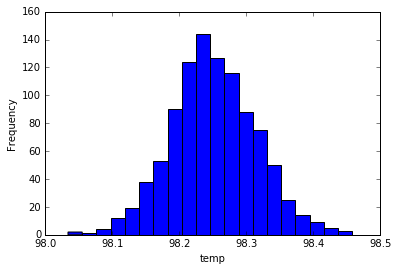

In [174]:
plt.hist(vals, bins=20, color='b')
plt.xlabel("temp")
plt.ylabel("Frequency")

In [175]:
print 'The max of the 95% confidence interval is ', vals.iloc[24], ' The min is', vals.iloc[975], 'The maximum value was', vals.iloc[0]

The max of the 95% confidence interval is  98.3830769231  The min is 98.1253846154 The maximum value was 98.4584615385


## The bootstrapped confidence interval of mean values does not include 98.6.  None of the bootstrapped means came close to 98.6.  Basically, we can conclude that the data do not support the mean value being 98.6 deg F.




## _________ 

# 3. At what temperature should we consider someone's temperature to be "abnormal"?

One might decide on a criterion for what constitutes an 'abnormal' body temperature.  A temperature measure that lies outside 95% of the distribution might well be considered abnormal.  For normally-distributed data, one could calculate the number of standard deviations away from the mean that one would need to fall outside this limit.  However, with a non-normal distribution, a computational approach can be used to estimate the values.  We are interested in the top and bottom 2.5% of the distribution of body temperatures.  Any value above/below these two limits would be considered rare.

Here, I estimate the values that indicate the upper and lower limits of the central 95% of the values in the body temperature data:

In [228]:
def TestStatistic(data):
    data=pd.Series(data)
    dat_sorted = data.sort_values(ascending=False)
    upperval=int(0.025*len(data))
    lowerval=int(0.975*len(data))
    upper = dat_sorted.iloc[upperval]
    lower = dat_sorted.iloc[lowerval]
    ant=(upper,lower)
    return ant

In [222]:
def RunModel(data):
    samp=np.random.choice(data,replace=True,size=len(data))
    return samp

In [229]:
vals=[TestStatistic(RunModel(temp)) for i in np.arange(999)]

#vals.head(20)

In [232]:
vals1=pd.DataFrame(vals,columns=['high','low'])

In [233]:
vals1['high'].mean()

99.60640640640588

In [234]:
vals1['low'].mean()

96.75065065065006

## From these resampled data, a body temperature higher that 99.61 deg F or lower than 96.75 could be considered 'extreme', or alternatively, not normal.

However, there may be differences between men and women that would suggest that the groups they comprise should be considered separately.  I test for this in the next section.

# 4. Is there a significant difference between males and females in normal temperature?

Here I use a resampling approach to determine if it is reasonable to conclude that male and female body temperatures are different.

In [235]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [236]:
group1=df['temperature'][df.gender=='M']
group2=df['temperature'][df.gender=='F']

In [237]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

In [243]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

In [239]:
actual = TestStatistic((group1, group2))
actual

0.289230769230727

In [241]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

In [244]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])

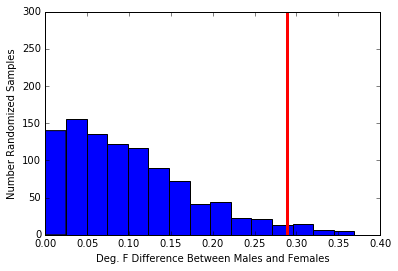

In [255]:
plt.hist(test_stats,bins=15,color='b')
plt.vlines(actual, 0, 300, linewidth=3, color='r')
plt.xlabel('Deg. F Difference Between Males and Females')
plt.ylabel('Number Randomized Samples')
None

In [249]:
pvalue = sum(test_stats >= actual) / float(len(test_stats))
pvalue

0.031

## The difference between body temperatures between men and women appears real

#### Men have body temperatures that are on average 0.29 deg F higher than those of women.  This difference is statistically significant.  This lends some credence to certain song lyrics, 'Hot Blooded, Check it and see...'. While not indicating a fever of 103, these data show that on average, compared to women, the body temperature of men is slightly higher.